# DGS on masked images

DGS is designed to work on images of granular material. Things other than grains in the image can cause large errors, because the algorithm using signal processing techniques on the image intensity.

However, DGS is set up to work with images that have been masked - any image region that you don't wish to include in the grain size analysis should be colored white

Such regions may include
* areas of fine particles unresolvable by eye
* vegetation
* other objects

In [1]:
import DGS
import matplotlib.pyplot as plt
from scipy.misc import imread

C:\Users\ddb265\AppData\Local\Continuum\anaconda3\envs\DGS\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### Processing settings

In [2]:
density = 10 # process every 10 lines
resolution = 1 # mm/pixel, i.e. no scale
dofilter =1 # filter the image
notes = 8 # notes per octave
maxscale = 8 #Max scale as inverse fraction of data length
verbose = 1 # print stuff to screen
x = 1 #no area to volume conversion

### Read and show original and masked images

In [3]:
## Image courtesy of Jon Pelletier, University of Arizona
image_file1 = '20170724_105025.jpg'
image_file2 = '20170724_105025_masked.jpg'

Text(0.5, 1.0, 'Masked')

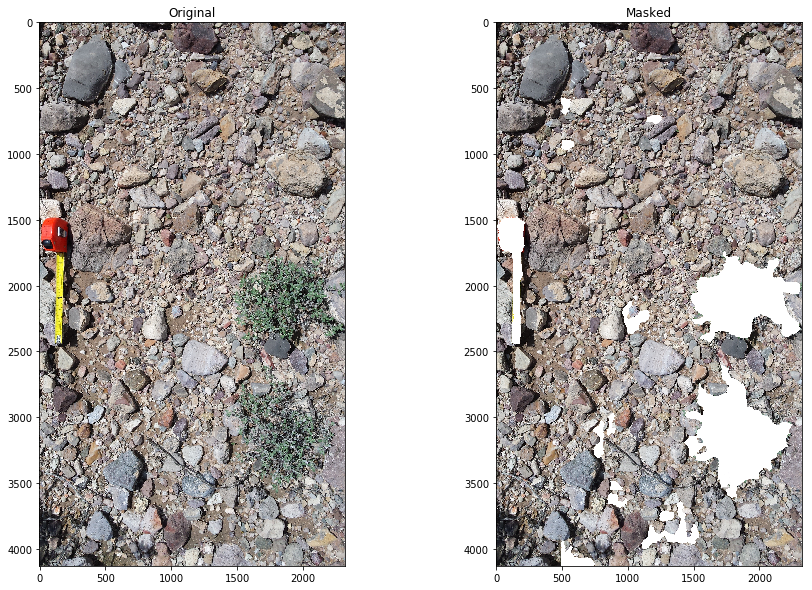

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
plt.subplot(121); plt.imshow(imread(image_file1))
plt.title('Original')
plt.subplot(122); plt.imshow(imread(image_file2))
plt.title('Masked')

### Work on unmasked image

In [5]:
dgs_stats1 = DGS.dgs(image_file1, density, resolution, dofilter, maxscale, notes, verbose, x)

======DIGITAL GRAIN SIZE: WAVELET==========
=CALCULATE GRAIN SIZE-DISTRIBUTION FROM AN=
====IMAGE OF SEDIMENT/GRANULAR MATERIAL====
======A PROGRAM BY DANIEL BUSCOMBE=========
=========NAU, FLAGSTAFF, ARIZONA===========
========REVISION 3.0.12, OCT 2018===========
Input image is 20170724_105025.jpg
Every 2 rows will be processed
Resolution is 1.0
Image will be filtered
Max scale as inverse fraction of data length: 8
Analysis of %s sub-octaves per octave: 8
Area to volume conversion constant = 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Processing image 20170724_105025.jpg
mean size = 164.7504120802135
stdev = 138.51147795266863
skewness = 0.011652826166428867
kurtosis = 0.04280098752693201


### Work on masked image

In [ ]:
dgs_stats2 = DGS.dgs(image_file2, density, resolution, dofilter, maxscale, notes, verbose, x)

======DIGITAL GRAIN SIZE: WAVELET==========
=CALCULATE GRAIN SIZE-DISTRIBUTION FROM AN=
====IMAGE OF SEDIMENT/GRANULAR MATERIAL====
======A PROGRAM BY DANIEL BUSCOMBE=========
=========NAU, FLAGSTAFF, ARIZONA===========
========REVISION 3.0.12, OCT 2018===========
Input image is 20170724_105025_masked.jpg
Every 2 rows will be processed
Resolution is 1.0
Image will be filtered
Max scale as inverse fraction of data length: 8
Analysis of %s sub-octaves per octave: 8
Area to volume conversion constant = 1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Processing image 20170724_105025_masked.jpg


### Compare grain size distributions

Text(0, 0.5, 'Normalized frequency [-]')

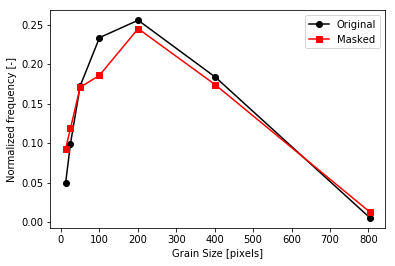

In [20]:
plt.plot(dgs_stats1['grain size bins'], dgs_stats1['grain size frequencies'], 'k-o', label='Original')
plt.plot(dgs_stats2['grain size bins'], dgs_stats2['grain size frequencies'], 'r-s', label='Masked')
plt.legend()
plt.xlabel('Grain Size [pixels]')
plt.ylabel('Normalized frequency [-]')